In [1]:
import json
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#get the csv files
Weekmean_bike = pd.read_csv(r'C:\Users\Maren\Desktop\TechLabs\hh_techlabs_group12\hh_techlabs_group12\bikemean.csv')
Weekmean_car = pd.read_csv(r'C:\Users\Maren\Desktop\TechLabs\hh_techlabs_group12\hh_techlabs_group12\carmean.csv')



In [3]:
Weekmean_car


,index,Week in year,result
0,0,202044,7514.288136
1,1,202045,11463.883459
2,2,202046,11482.457240
3,3,202047,11364.189921
4,4,202048,11748.665075
5,5,202049,11609.371255
6,6,202050,11445.989058
7,7,202051,11201.338784
8,8,202052,8456.426118
9,9,202053,7629.139024


In [4]:
Weekmean_bike

,index,Week in year,result
0,0,202001,228.571429
1,1,202002,575.538462
2,2,202003,686.191489
3,3,202004,1112.494505
4,4,202005,748.919540
...,...,...,...
82,82,202130,1251.314427
83,83,202131,1301.646766
84,84,202132,1498.173544
85,85,202133,1091.966418


In [5]:
new_data=Weekmean_bike.merge(Weekmean_car, on='Week in year', how='left')

#Weekmean_bike.set_index('Week in year').join(Weekmean_car.set_index('Week in year')) 

In [6]:
new_data


,index_x,Week in year,result_x,index_y,result_y
0,0,202001,228.571429,NaN,NaN
1,1,202002,575.538462,NaN,NaN
2,2,202003,686.191489,NaN,NaN
3,3,202004,1112.494505,NaN,NaN
4,4,202005,748.919540,NaN,NaN
...,...,...,...,...,...
82,82,202130,1251.314427,39.0,12340.513241
83,83,202131,1301.646766,40.0,12948.823352
84,84,202132,1498.173544,41.0,14535.598093
85,85,202133,1091.966418,NaN,NaN


In [7]:
new_data.dtypes

index_x           int64
Week in year      int64
result_x        float64
index_y         float64
result_y        float64
dtype: object

In [8]:
new_data.columns

Index(['index_x', 'Week in year', 'result_x', 'index_y', 'result_y'], dtype='object')

In [9]:
new_data=new_data.rename(columns={"result_x": "bikes", "result_y": "cars"})

In [10]:
columns = ['Week in year','bikes', 'cars']

new_data

,index_x,Week in year,bikes,index_y,cars
0,0,202001,228.571429,NaN,NaN
1,1,202002,575.538462,NaN,NaN
2,2,202003,686.191489,NaN,NaN
3,3,202004,1112.494505,NaN,NaN
4,4,202005,748.919540,NaN,NaN
...,...,...,...,...,...
82,82,202130,1251.314427,39.0,12340.513241
83,83,202131,1301.646766,40.0,12948.823352
84,84,202132,1498.173544,41.0,14535.598093
85,85,202133,1091.966418,NaN,NaN


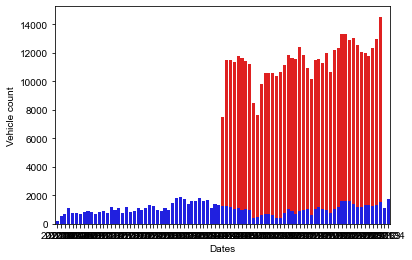

In [11]:
#  https://www.geeksforgeeks.org/how-to-overlap-two-barplots-in-seaborn/
  
# creating subplots
ax = plt.subplots()
  
# plotting columns
ax = sns.barplot(x=new_data["Week in year"], y=new_data["cars"], color='r')
ax = sns.barplot(x=new_data["Week in year"], y=new_data["bikes"], color='b')

  
# renaming the axes
ax.set(xlabel="Dates", ylabel="Vehicle count")
  
# visulaizing illustration

sns.set(rc={'figure.figsize':(30,10.27)})
plt.show()

In [12]:
#only keep the days with data for both, cars and bikes
#data for cars: 2020-11-01 (Week in year: 202044 ) to 2021-08-13 (Week in year: 202132 )

new_data_clean = new_data[new_data['Week in year']>=202044]
new_data_clean = new_data_clean[new_data_clean['Week in year']<=202132]


In [13]:
new_data_clean

,index_x,Week in year,bikes,index_y,cars
43,43,202044,1228.684303,0.0,7514.288136
44,44,202045,1275.924162,1.0,11463.883459
45,45,202046,1188.199295,2.0,11482.457240
46,46,202047,1022.449378,3.0,11364.189921
47,47,202048,1121.646520,4.0,11748.665075
48,48,202049,973.694574,5.0,11609.371255
49,49,202050,1064.354278,6.0,11445.989058
50,50,202051,944.571240,7.0,11201.338784
51,51,202052,439.267532,8.0,8456.426118
52,52,202053,509.898701,9.0,7629.139024


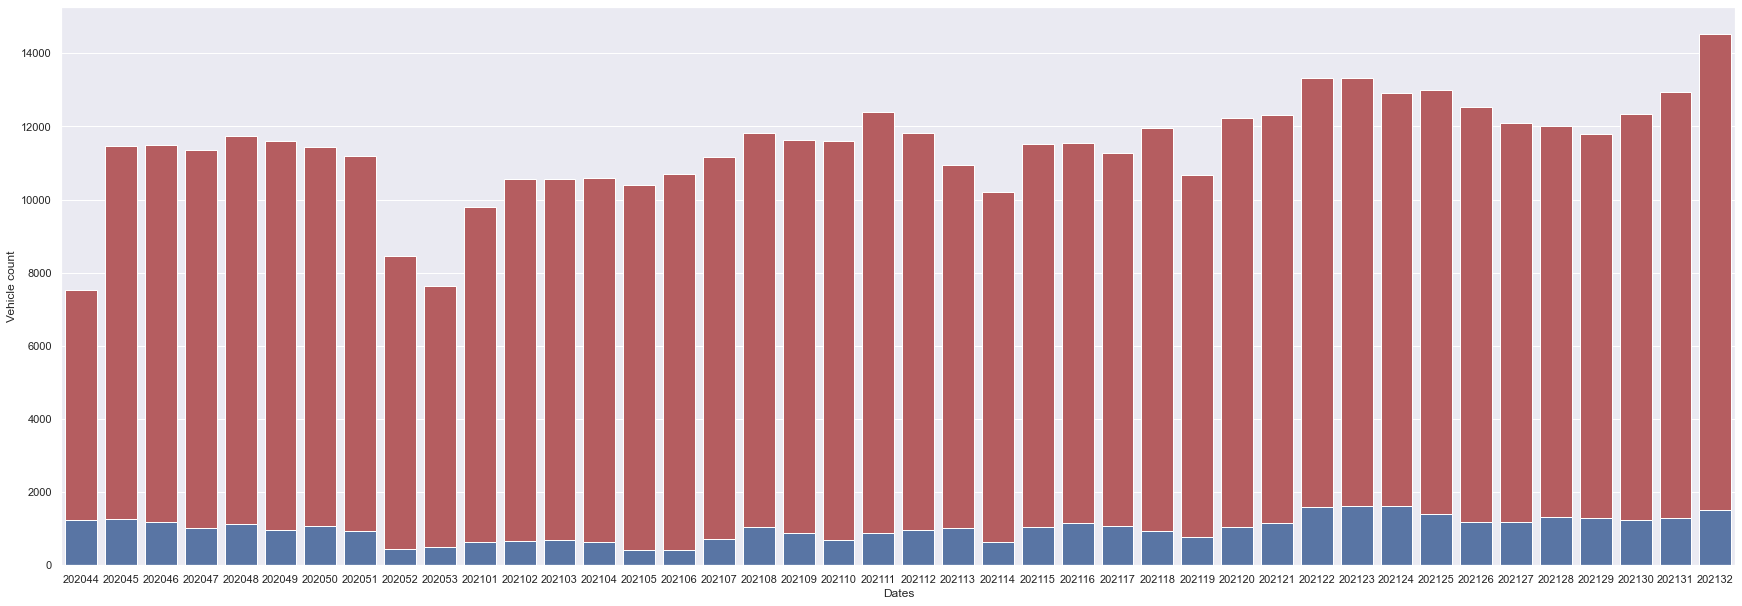

In [14]:
# creating subplots
ax = plt.subplots()
  
# plotting columns
ax = sns.barplot(x=new_data_clean["Week in year"], y=new_data["cars"], color='r')
ax = sns.barplot(x=new_data_clean["Week in year"], y=new_data["bikes"], color='b')

  
# renaming the axes
ax.set(xlabel="Dates", ylabel="Vehicle count")
  
# visulaizing illustration

sns.set(rc={'figure.figsize':(30,20)})
plt.show()

In [15]:
# only bikes
# sns.catplot(x="Week in year", y="bikes", data=new_data_clean, height=5, aspect=5, kind = "bar")

In [16]:
#only cars
#sns.catplot(x="Week in year", y="cars", data=new_data_clean, height=5, aspect=5, kind = "bar")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, '202044'),
  Text(1, 0, '202045'),
  Text(2, 0, '202046'),
  Text(3, 0, '202047'),
  Text(4, 0, '202048'),
  Text(5, 0, '202049'),
  Text(6, 0, '202050'),
  Text(7, 0, '202051'),
  Text(8, 0, '202052'),
  Text(9, 0, '202053'),
  Text(10, 0, '202101'),
  Text(11, 0, '202102'),
  Text(12, 0, '202103'),
  Text(13, 0, '202104'),
  Text(14, 0, '202105'),
  Text(15, 0, '202106'),
  Text(16, 0, '202107'),
  Text(17, 0, '202108'),
  Text(18, 0, '202109'),
  Text(19, 0, '202110'),
  Text(20, 0, '202111'),
  Text(21, 0, '202112'),
  Text(22, 0, '202113'),
  Text(23, 0, '202114'),
  Text(24, 0, '202115'),
  Text(25, 0, '202116'),
  Text(26, 0, '202117'),
  Text(27, 0, '202118'),
  Text(28, 0, '202119'),
  Text(29, 0, '202120'),
  Text(30, 0, '202121'),
  Text(31, 0, '202122'),
  Text(32, 0, '2

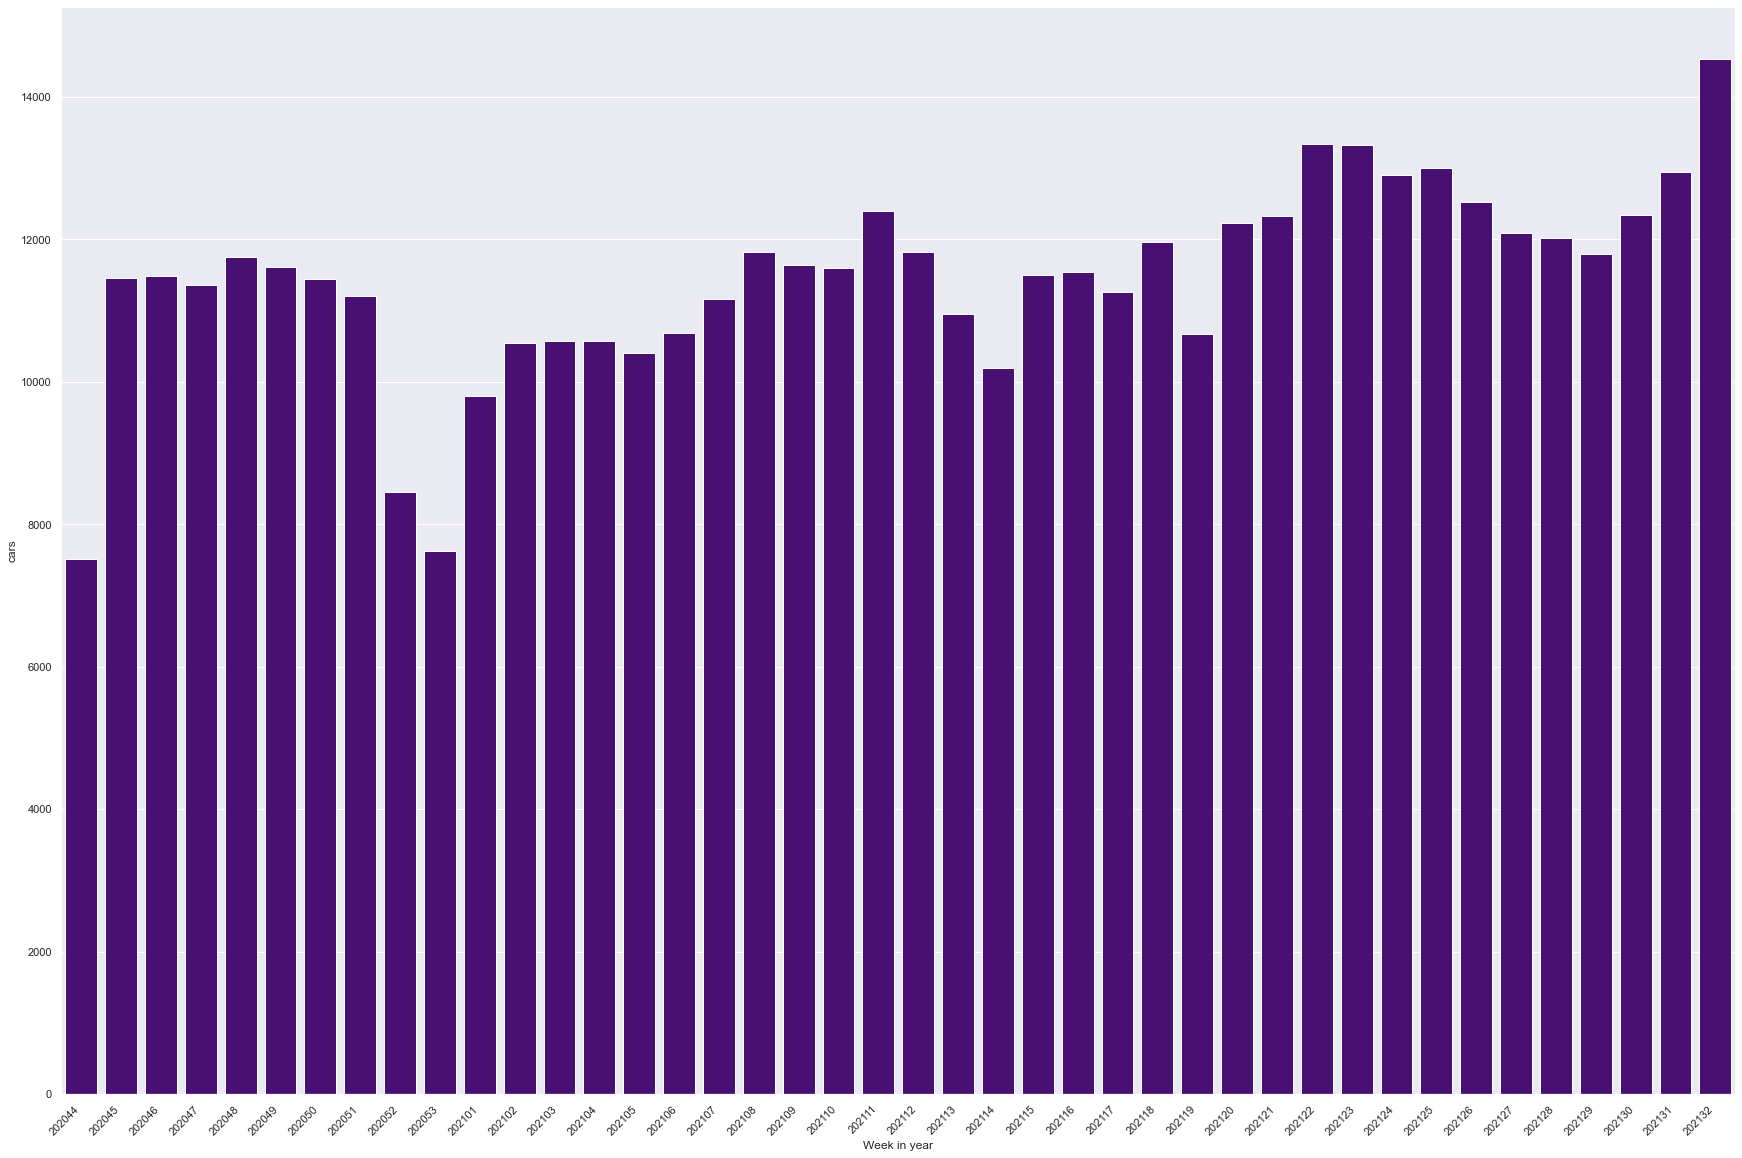

In [17]:
import matplotlib.style as style
style.available

#style.use('seaborn-talk') #sets the size of the charts
#style.use('ggplot')


#try to adapt the labels on the x-axis (to show the months, not the weeks/year)

#colours: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
sns.barplot(x=new_data_clean["Week in year"], y=new_data["cars"], color = 'indigo')
plt.xticks(rotation=45, ha='right')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, '202044'),
  Text(1, 0, '202045'),
  Text(2, 0, '202046'),
  Text(3, 0, '202047'),
  Text(4, 0, '202048'),
  Text(5, 0, '202049'),
  Text(6, 0, '202050'),
  Text(7, 0, '202051'),
  Text(8, 0, '202052'),
  Text(9, 0, '202053'),
  Text(10, 0, '202101'),
  Text(11, 0, '202102'),
  Text(12, 0, '202103'),
  Text(13, 0, '202104'),
  Text(14, 0, '202105'),
  Text(15, 0, '202106'),
  Text(16, 0, '202107'),
  Text(17, 0, '202108'),
  Text(18, 0, '202109'),
  Text(19, 0, '202110'),
  Text(20, 0, '202111'),
  Text(21, 0, '202112'),
  Text(22, 0, '202113'),
  Text(23, 0, '202114'),
  Text(24, 0, '202115'),
  Text(25, 0, '202116'),
  Text(26, 0, '202117'),
  Text(27, 0, '202118'),
  Text(28, 0, '202119'),
  Text(29, 0, '202120'),
  Text(30, 0, '202121'),
  Text(31, 0, '202122'),
  Text(32, 0, '2

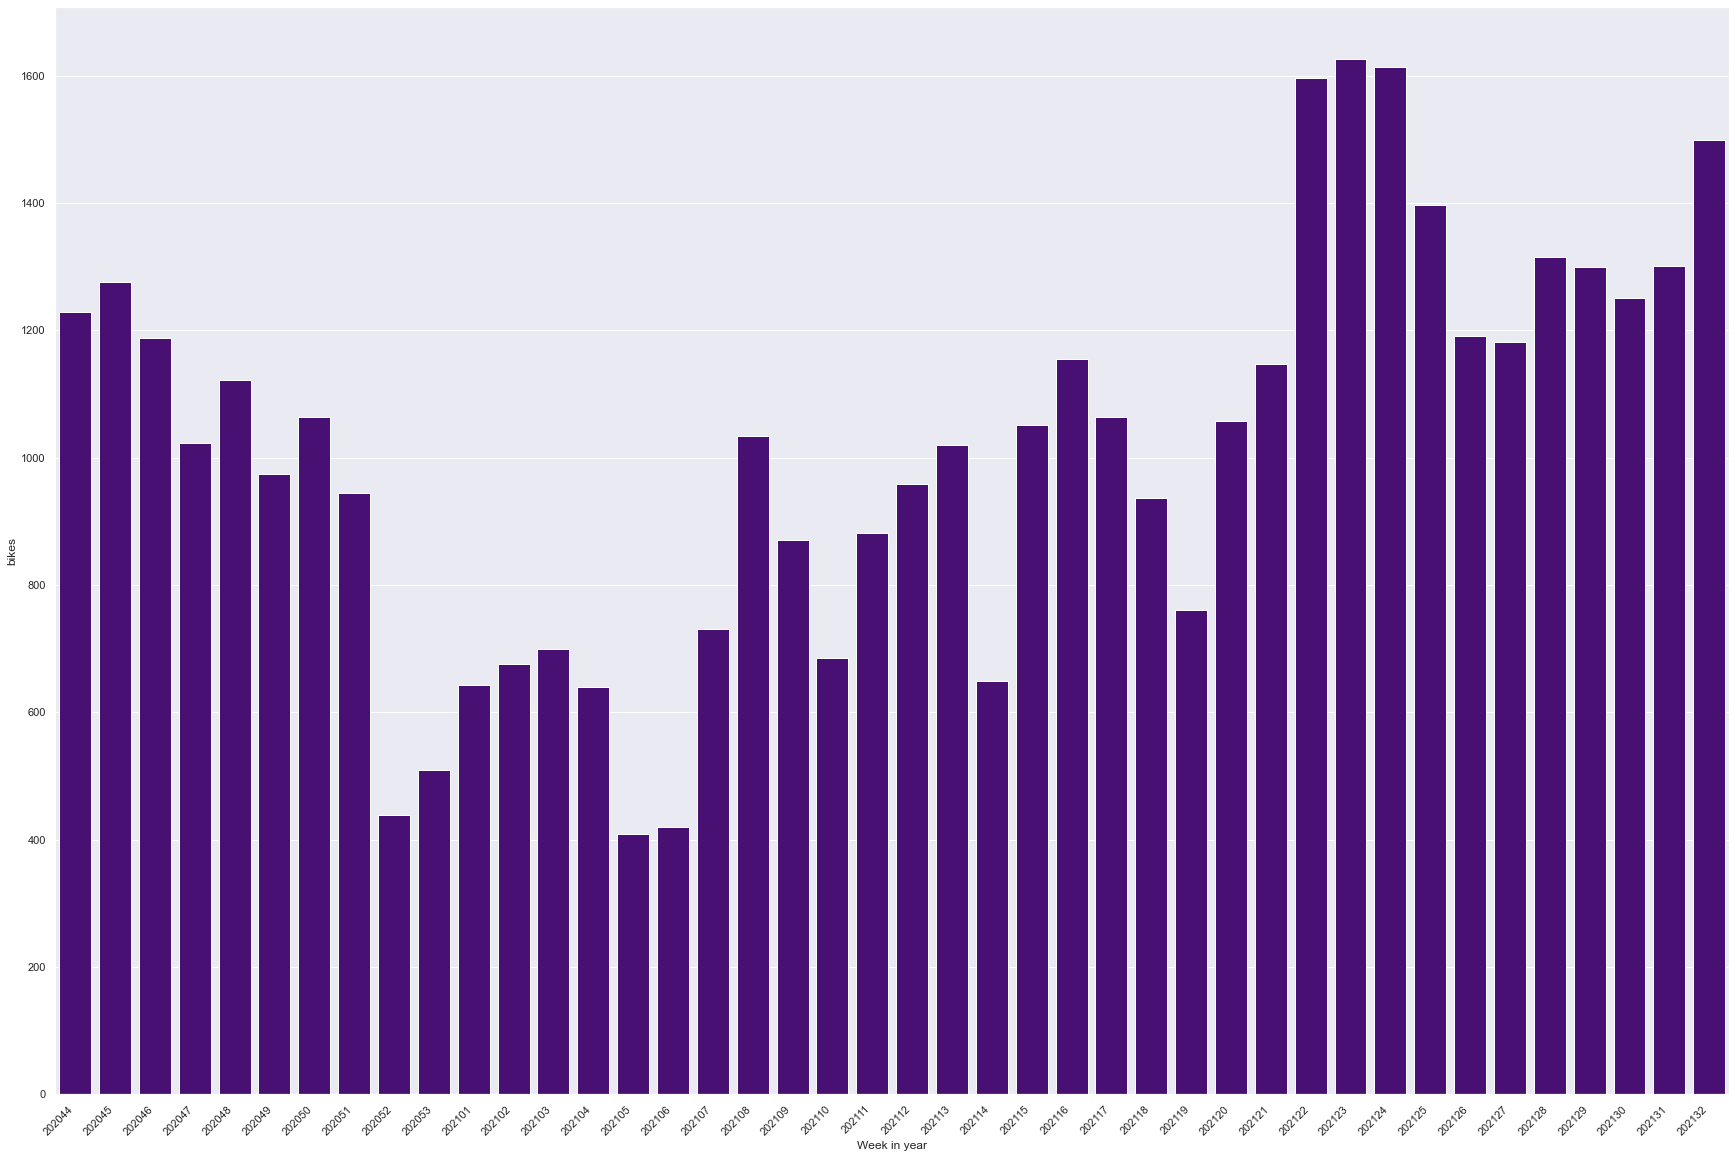

In [18]:

sns.barplot(x=new_data_clean["Week in year"], y=new_data["bikes"], color = 'indigo')
plt.xticks(rotation=45, ha='right')

